# **Exploratory Data Analysis of pima_diabetes_data**

### **Introduction:**
Diabetes is one of the deadliest diseases in the world. It is not only a disease but also creator of different kinds of diseases like heart attack, blindness etc. The normal identifying process is that patients need to visit a diagnostic center, consult their doctor, and sit tight for a day or more to get their reports.


**Factors Associated with diabetes:**


*   Weight
*   Fat distribution
*   Family history
*   Age
*   Prediabetes
*   Pregnancy-related risks
*   Polycystic ovary syndrome
*   Areas of darkened skin, usually in the armpits and neck. 


 


## **AIM:**
The aim of my project is to perform Exploratory data analysis on pima_diabetes_data.It includes understanding of variables by doing statistical analysis and graphical representation,Discovering the duplicates in the data,missing values in the data, outliers in the data,performing feature transformation. Identify patterns by visualizing data in graphs such as box plots, scatter plots,histograms and heatmap.

This dataset comes from the National Institute of Diabetes and Digestive and Kidney Diseases.

**About Dataset**

*   **Pregnancies**: No. of times pregnant
*   **Glucose**: Plasma Glucose Concentration (mg/dl)
*   **Blood** **Pressure**: Diastolic Blood Pressure(mmHg)
*   **Skin** **Thickness**:A value used to estimate body fat. Normal Triceps 
*   **Insulin**: 2-Hour Serum Insulin (mu U/ml)
*   **BMI**: Body Mass Index (weight in kg/ height in m2)
*   **Diabetes Pedigree Function**: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.

*   **Age**:Age (years)
*  **Outcome:** Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.




















### **Importing Data and Required Packages**

In [22]:
# importing necessary libraries 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [23]:
data_diabetes=pd.read_excel('pima-indians-diabetes.xlsx',header=None)  # reading the input data from excel file


In [24]:
data_diabetes.columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']  # adding column names to the dataframe

In [25]:
data_diabetes_copy=data_diabetes.copy() # copying for future use

### **Statistical Analysis**

**check the shape of dataframe**

In [26]:
data_diabetes.shape # exploring number of observations and variables

(768, 9)

#### **Inferences:**
There are 768 instances in the data set and 9 features



In [27]:
data_diabetes.info() #  prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


#### **Inferences:**
We have 768 observations and 9 variables. The data type of Pregnancies,Glucose,Blood Pressure,SkinThicness ,Insulin,Age and Outcome is integer as per input data,but it taken as float so we have to convert to int for these columns

Convert the data types as mentioned

In [28]:
data_diabetes=data_diabetes.astype({'Pregnancies':'int64', 'Glucose':'int64', 'BloodPressure':'int64', 'SkinThickness':'int64', 'Insulin':'int64',
       'Age':'int64', 'Outcome':'int64'})  #converting float to int

In [29]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**To display the first rows of dataframe**

In [30]:
data_diabetes.head() # displays first five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **Inferences:**
By observing the first rows of our data it is found there are 8 independent variables and one dependent variable and also SkinThickness and Insulin have 0 in some observations

**To display the last 10 rows of dataframe**

In [31]:
data_diabetes.tail(10)  # displays last ten rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**To display the no.of unique values in each feature**

In [32]:
data_diabetes.nunique()  # displays no of distinct elements 

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

**Summary of the dataset**

In [33]:
data_diabetes.describe(include = 'all')  # statistical summary of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### **Inferences:**
### There are 9 variables in this dataset. Outcome is our target/ dependent variable. All are numeric variables. Outcome is a categorical variable and can have value either 0 or 1. It can be seen that there is no NaN value for any of the variables.

### But we can see Glucose, BloodPressure, SkinThickness, Insulin, BMI Features have minimum value 0. That does not make any sense. We will check each feature one by one.


**Finding mean of each independet variable based on target variable**

In [34]:
data_diabetes.groupby('Outcome').mean() # calculating mean of each feature based on its outcome

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


#### **Inferences:**

All the features have different mean with respect to outcome,it means all the variable have their value depend on wheather they have diabetic or not

**Checking for duplicate observations**

In [35]:
data_diabetes.duplicated().sum() # to check for duplicates

0

#### **Inferences:**
from the above it is observed that there are no duplicated rows in the dataset

**Checking for null values**

In [36]:
data_diabetes.isnull().sum() # is null is used to check the null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### **Inferences:**

from the above it is observed that there are no nan in the dataset

### **Exploring data by graphs:**

#### **Univariate Analysis**

##### **Visualization of Independent Features**

In [37]:
import plotly.io as pio

pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [38]:
 pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


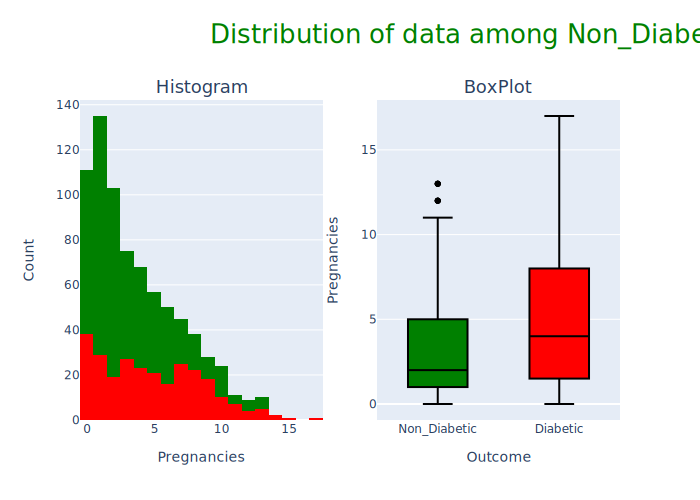

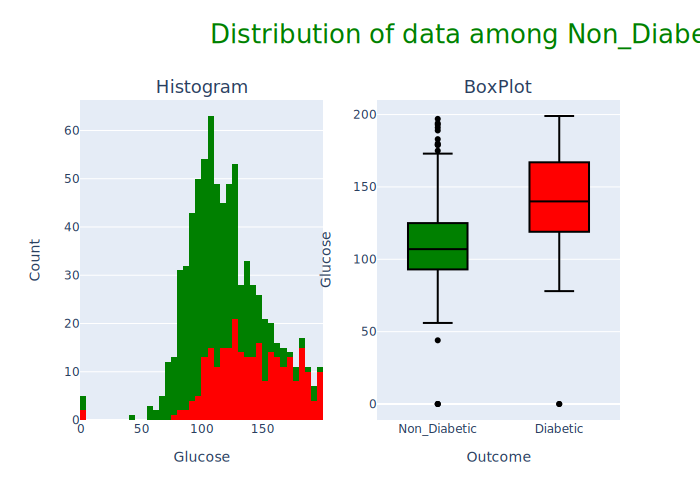

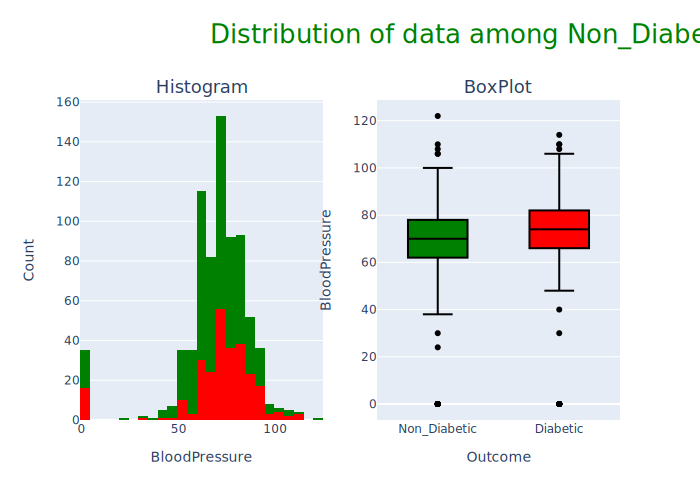

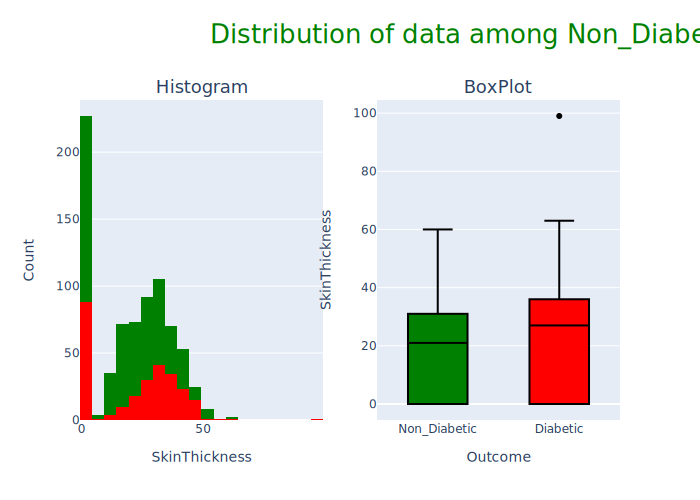

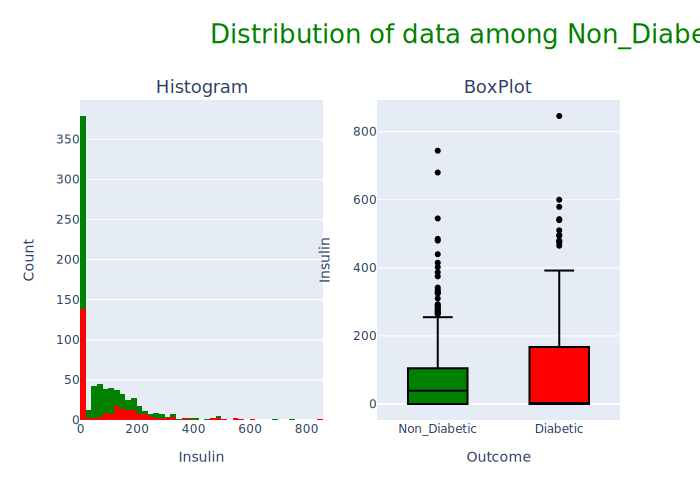

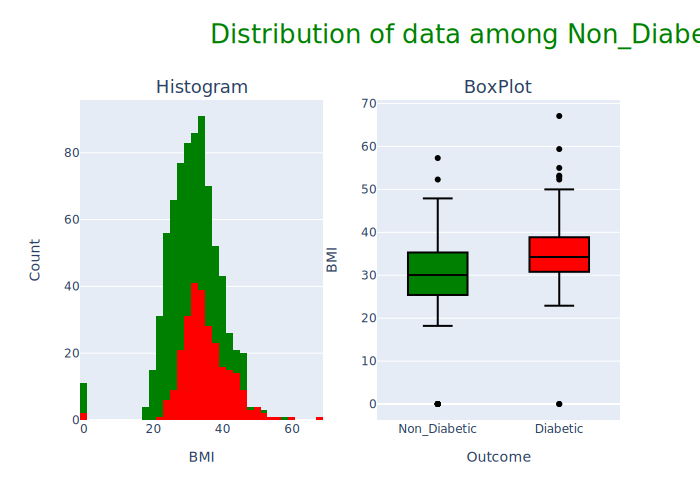

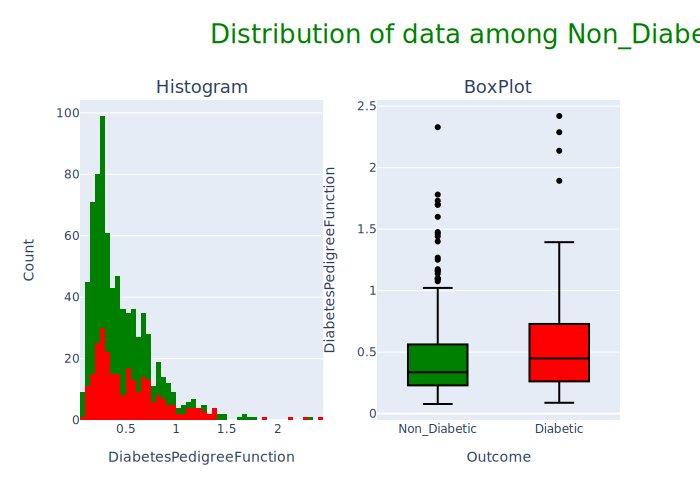

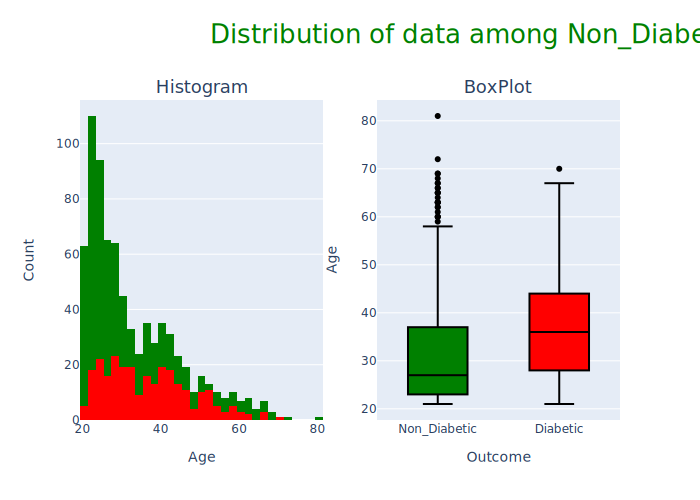

In [39]:
# Here iam displaying distribution of independent variables by using histogram and boxplot
for col in data_diabetes:  # iterating through dataset
  if col!='Outcome':  # only for independent features
    fig = make_subplots(rows=1, cols=2,subplot_titles=['Histogram','BoxPlot'], horizontal_spacing=0.1,vertical_spacing=0.2) # using subplots of plotly
    Non_Diabetic = data_diabetes[data_diabetes['Outcome']==0] # dividing data based on outcome
    Diabetic = data_diabetes[data_diabetes['Outcome']==1]
    fig.add_trace(go.Histogram(histfunc="count",x=Diabetic[col],
                                                    name="Diabetic",marker_color='red'),row=1, col=1) # ploting histogram

    fig.add_trace(
    go.Histogram(histfunc="count",x=Non_Diabetic[col],
                            name="Healthy",marker_color='green'),
    row=1, col=1)
    fig.update_layout(barmode='stack')
    fig.add_trace(go.Box(y=Non_Diabetic[col], name="Non_Diabetic",line=dict(color='black'),fillcolor='green',),row=1,col=2) # ploting boxplot
    fig.add_trace(go.Box(y=Diabetic[col], name="Diabetic",line=dict(color='black'),fillcolor='red'),row=1,col=2)
    fig.update_annotations(font_size=18)
    fig.update_layout({'title':{'text':"Distribution of data among Non_Diabetic and Diabetic",
                            'x':0.3,'y':0.95,
                            'font_size':26,
                            'font_color':'Green'}}, # setting layout
                  showlegend=False)
    fig['layout']['xaxis']['title']=col  #setting names for axises
    fig['layout']['xaxis2']['title']='Outcome'
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']=col
    fig.show(renderer="svg")

##### **Observations:**

**From the above plots we can say**

*  The no of pregnancies are right skewed and there are outliers in Non_Diabetic population
*  Glucouse is slightly right skewed and there are outliers in Non_Diabetic population and also  some population have Glucose value is 0

*  Blood Presssure is slightly left skewed and there are outliers in diabetic population and also some population have Blood Presssure is 0


*  Skinthicknessis normally distributed and there are less outliers in Non_Diabetic population and also  some population have Skinthicknessis value is 0


*  Insulin is slightly right skewed and there are outliers in Non_Diabetic population and also  some population have Insulin value is 0


*  BMI is snormally distributed and there are outliers in Non_Diabetic  and diabetic population and also  some population have BMI value is 0


*  Diabteic Pedigree Function is slightly right skewed and there are outliers in Non_Diabetic and diabetic  population 

*  Non_DiabeticAgeis right skewed and there are outliers in Non_Diabetic  and diabetic population and also  some population have Age value is 0

#### **Visualization of Target Variable**

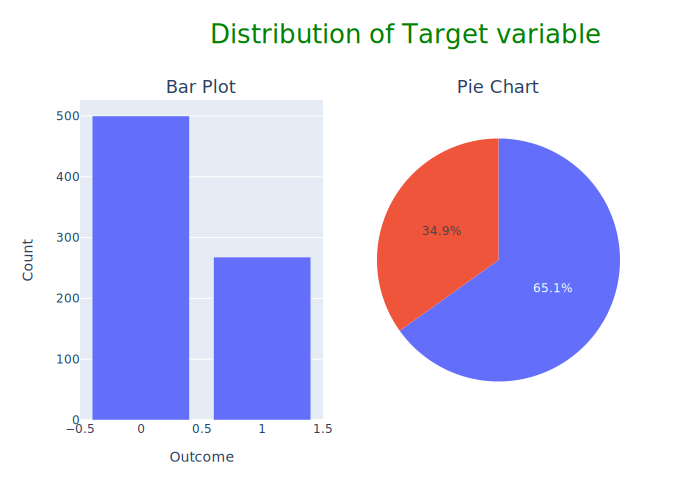

In [40]:
fig = make_subplots(rows=1, cols=2,specs=[[{'type':'xy'},{'type':'domain'}]],subplot_titles=['Bar Plot','Pie Chart'], horizontal_spacing=0.1,vertical_spacing=0.2)
fig.add_trace(go.Bar(x=data_diabetes['Outcome'].value_counts().index,y=data_diabetes['Outcome'].value_counts().values,),row=1,col=1) #for bar plot
fig.add_trace(go.Pie(labels=data_diabetes['Outcome'].value_counts().index,values=data_diabetes['Outcome'].value_counts().values),row=1,col=2) #for pie chart
fig.update_annotations(font_size=18)
fig.update_layout({'title':{'text':"Distribution of Target variable",
                            'x':0.3,'y':0.95,
                            'font_size':26,
                            'font_color':'Green'}}, # setting layout
                  showlegend=False)
fig.update_xaxes(title_text='Outcome') # naming the axis
fig.update_yaxes(title_text='Count')
fig.show(renderer="svg")

##### **Obervations:**
 There are 268 people who are Non_Diabetic and 500 were diabetic
 The data is imbalanced

#### **Multi_variate and Bi_variate analysis**

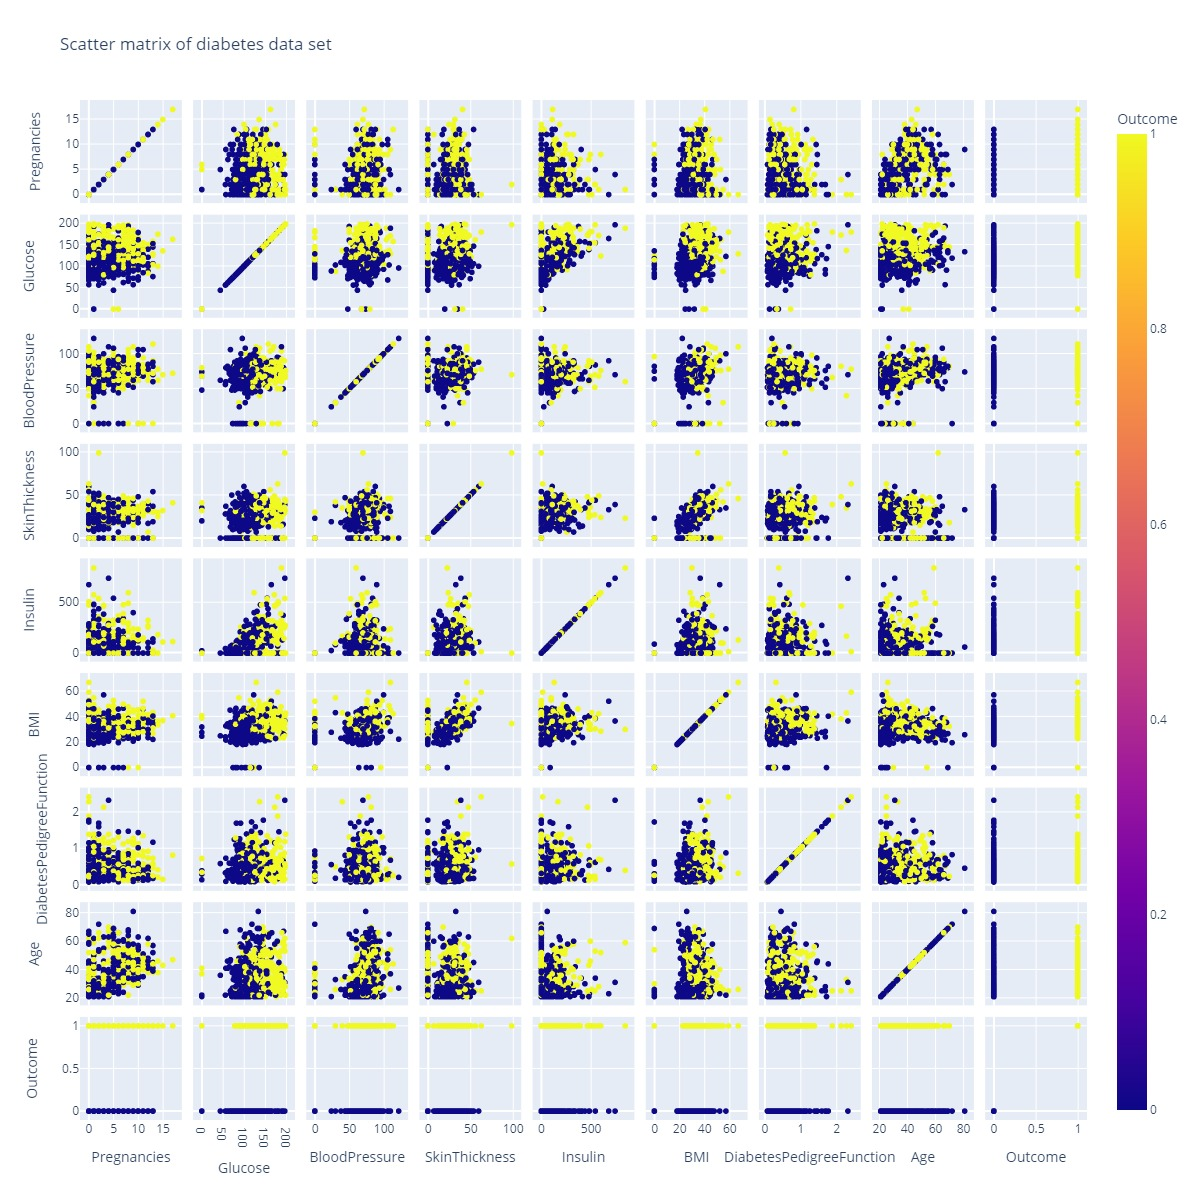

In [41]:
fig=px.scatter_matrix(data_diabetes, 
    color="Outcome",
    title="Scatter matrix of diabetes data set",
    width=1200,height=1200)    # ploting the scatter plot
fig.update_layout(showlegend=False)
fig.show(renderer="jpg")

#### **Inferences:**

There is a relationship between insulin and glucose
There is a relationship between SkinThickness and BMI
There is a relationship between Pregnancies and Age

#### **Correlation analysis:**

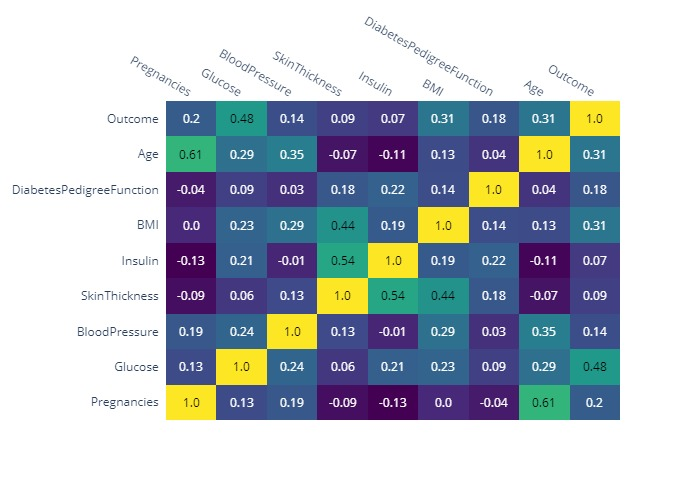

In [42]:
import plotly.figure_factory as ff
diabetes_corr = data_diabetes.corr(method="spearman") # Generate correlation matrix for spearman correlation as data is having outliers

x = list(diabetes_corr.columns)
y = list(diabetes_corr.index)
z = np.array(diabetes_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis'
    )
fig.show(renderer="jpg")

####**Dependency among independent features and dependent feature**

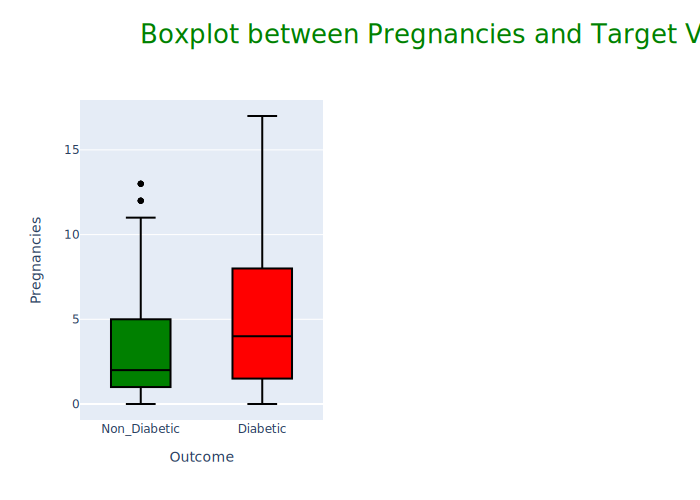

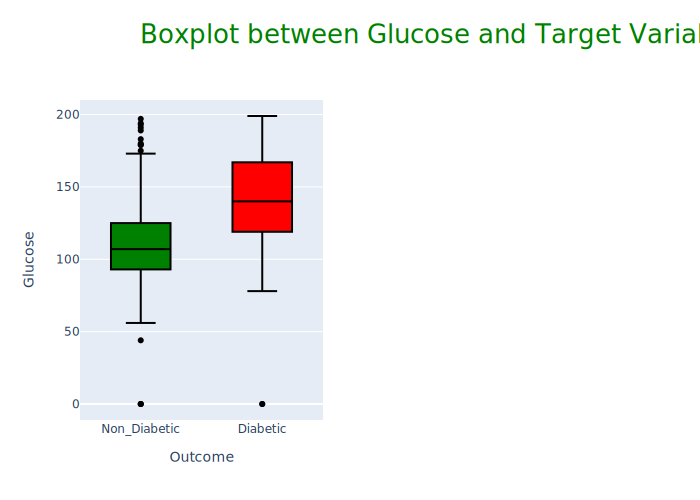

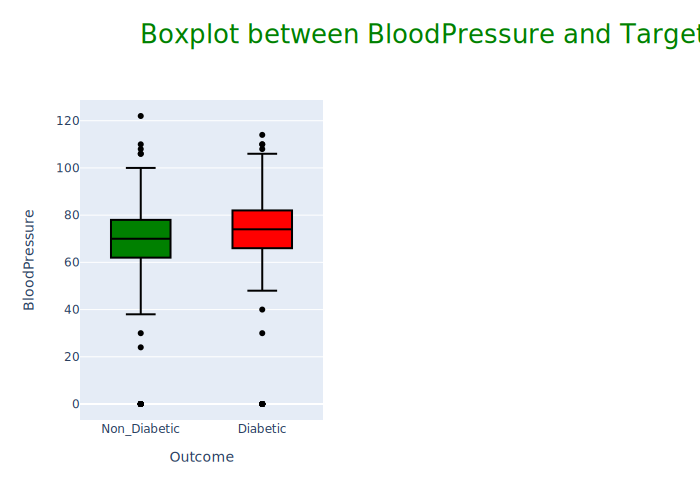

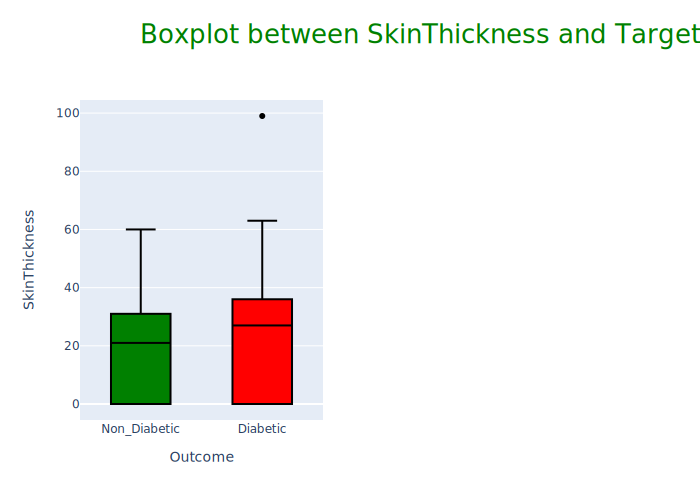

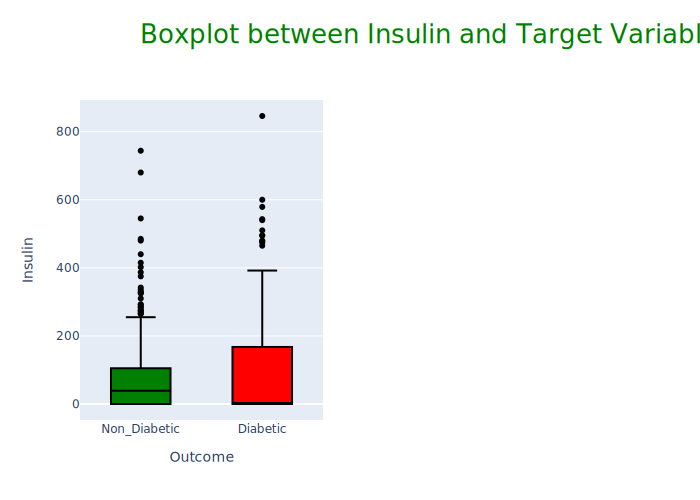

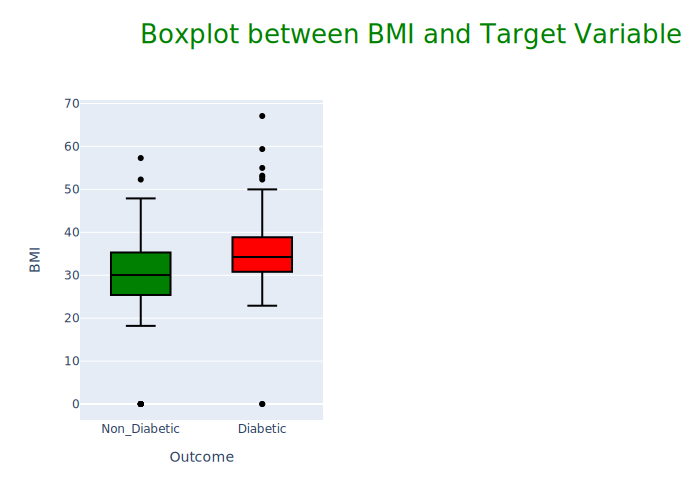

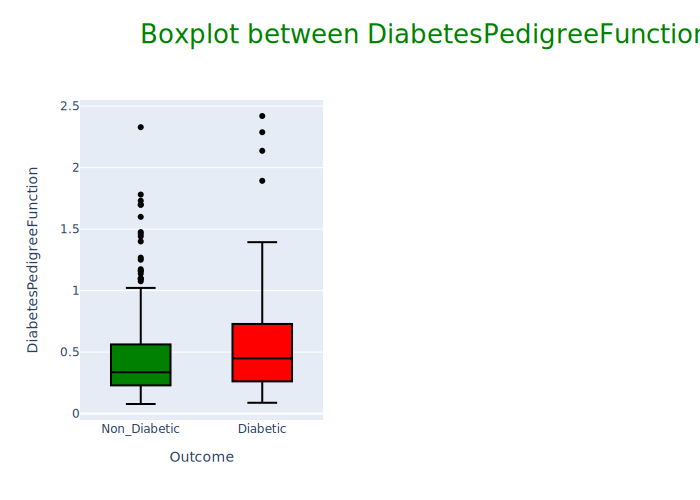

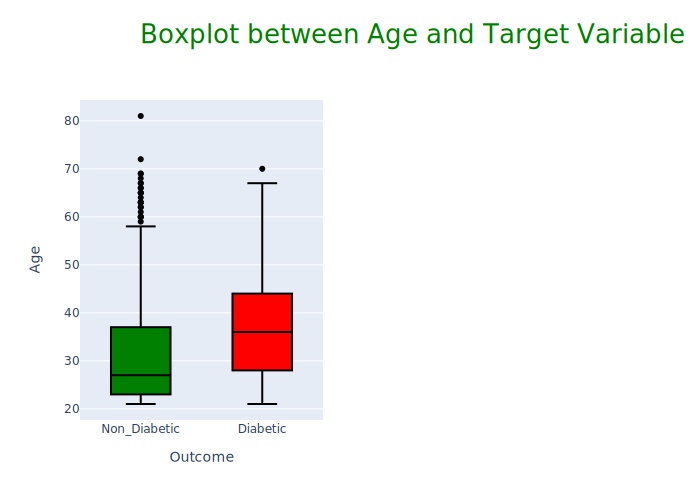

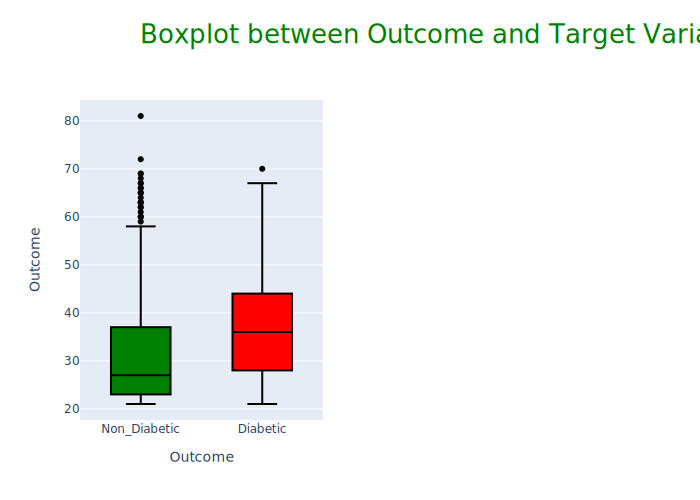

In [95]:
i=1
j=1
Non_Diabetic = data_diabetes[data_diabetes['Outcome']==0]
Diabetic = data_diabetes[data_diabetes['Outcome']==1]
for col in data_diabetes:  # iterating through dataset
  if col!='Outcome':
    fig = make_subplots(rows=1, cols=2,horizontal_spacing=0.1,vertical_spacing=0.2)
    fig.add_trace(go.Box(y=Non_Diabetic[col], name="Non_Diabetic",line=dict(color='black'),fillcolor='green',),row=i,col=j)  # plotting bocplot for each population
    fig.add_trace(go.Box(y=Diabetic[col], name="Diabetic",line=dict(color='black'),fillcolor='red'),row=i,col=j)  
    j=j+1
    if j==2:
      j=1
  fig.update_annotations(font_size=18)
  fig.update_layout({'title':{'text':"Boxplot between "+col+" and Target Variable",
                            'x':0.2,'y':0.95,
                            'font_size':26,
                            'font_color':'Green'}},
                  showlegend=False)
  fig['layout']['xaxis']['title']='Outcome'
  fig['layout']['xaxis2']['title']='Outcome'
  fig['layout']['yaxis']['title']=col
  fig['layout']['yaxis2']['title']=col
  fig.show(renderer="svg")


#### **Observations:**

The median value of all variable are differ between Non_diabetic annd diabetic people,Outliers are present in most of the variables

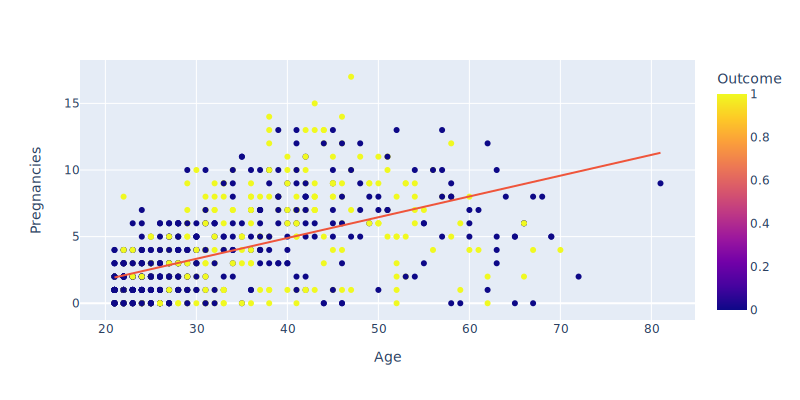

In [96]:
fig = px.scatter(data_diabetes, x="Age", y="Pregnancies", width=800, height=400,color='Outcome',trendline="ols")
fig.show(renderer="svg")

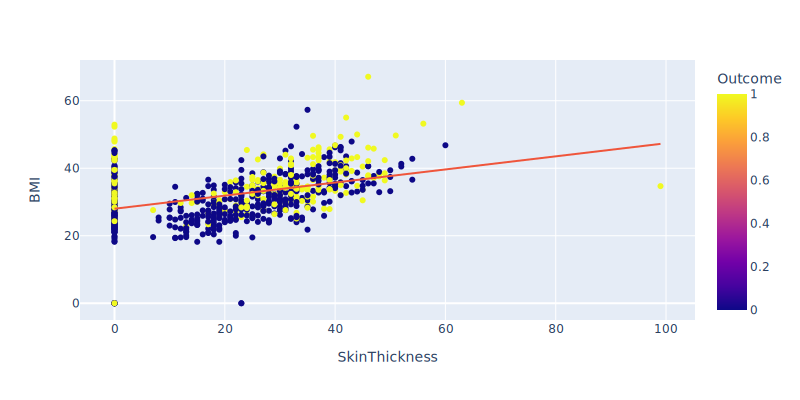

In [97]:
fig = px.scatter(data_diabetes, x="SkinThickness", y="BMI", width=800, height=400,color='Outcome',trendline="ols")
fig.show(renderer="svg")

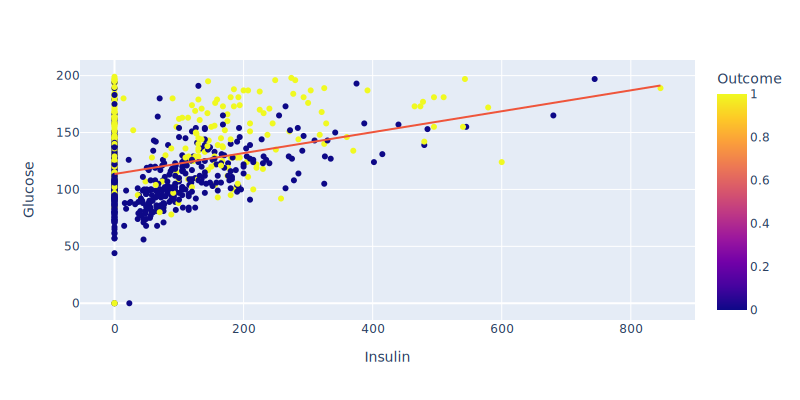

In [98]:
fig = px.scatter(data_diabetes, x="Insulin", y="Glucose", width=800, height=400,color='Outcome',trendline="ols")
fig.show(renderer="svg")

## **Initial Observations:**




*   There are 8 independent features and one dependent feature

*   Dependent feature has two values 0 means non_diabetic,1 means diabetic

*   The features like Glucose,BloodPressure,SkinThickness,Insulin and BMI have 0 as minimum value but it is not possible in real life. so we have to condiser it as missing value and handle them

*   There are ouliers in most of the features and we have to handle them

*   The mean of each variable is different for diabetic and non_diabteic population


*   There is a dependency between Glucose and Insulin,Skinthickness and BMI,age and pregnancies


*   Most of the features are rightly skewed


*   The data set is imbalanced





## **Handling Missing values**

In [99]:
#separating diabetic and non_diabetic
Non_Diabetic_n = data_diabetes[data_diabetes['Outcome']==0]
Diabetic_n = data_diabetes[data_diabetes['Outcome']==1]

### **Replacing with NaN**

In [100]:
Non_Diabetic_n[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Non_Diabetic_n[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
Diabetic_n[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Diabetic_n[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [101]:
Non_Diabetic_n.isnull().sum()

Pregnancies                   0
Glucose                       3
BloodPressure                19
SkinThickness               139
Insulin                     236
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [102]:
Diabetic_n.isnull().sum()

Pregnancies                   0
Glucose                       2
BloodPressure                16
SkinThickness                88
Insulin                     138
BMI                           2
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### **plotting Non_diabetic population**

<AxesSubplot:>

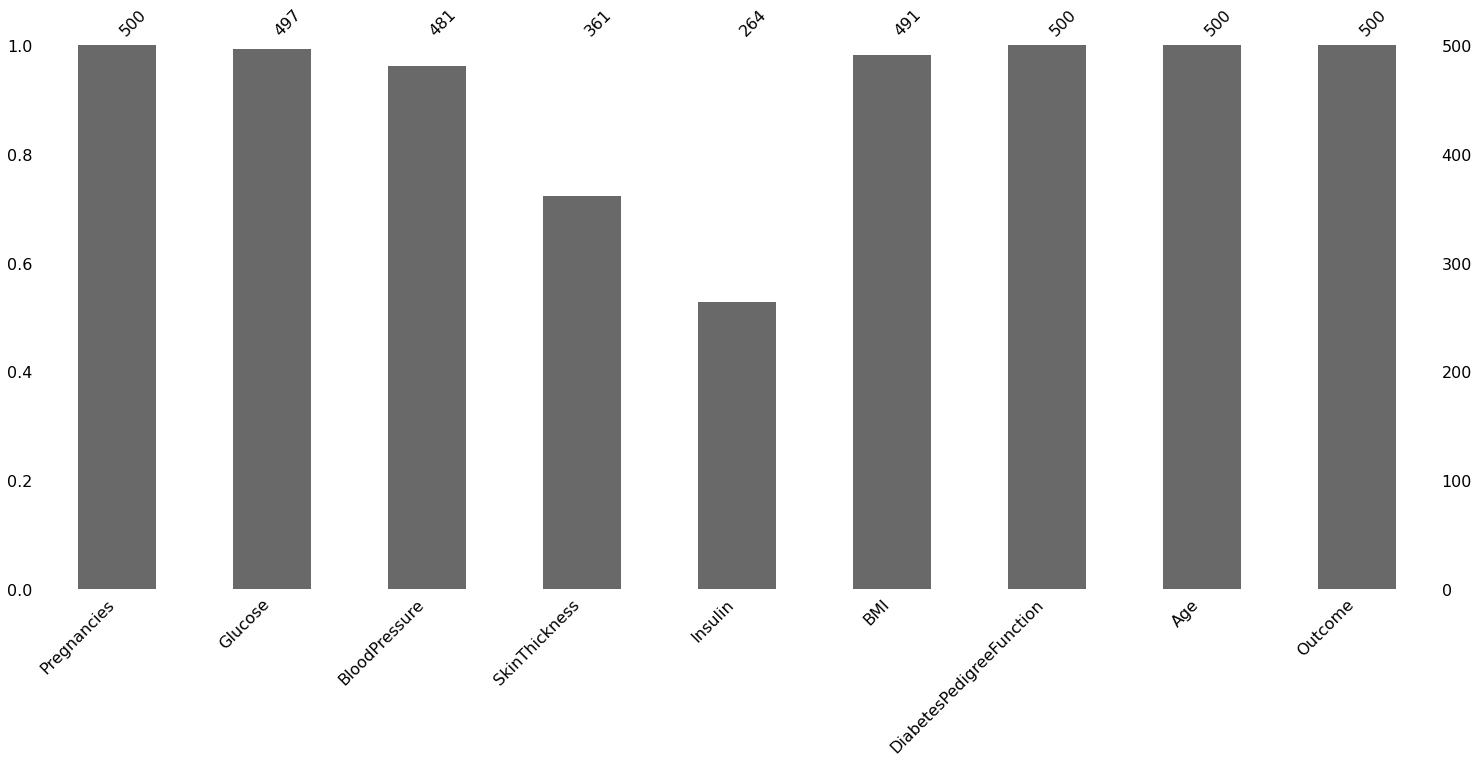

In [103]:
import missingno as msno 
msno.bar(Non_Diabetic_n)

#### **plotting diabetic population**

<AxesSubplot:>

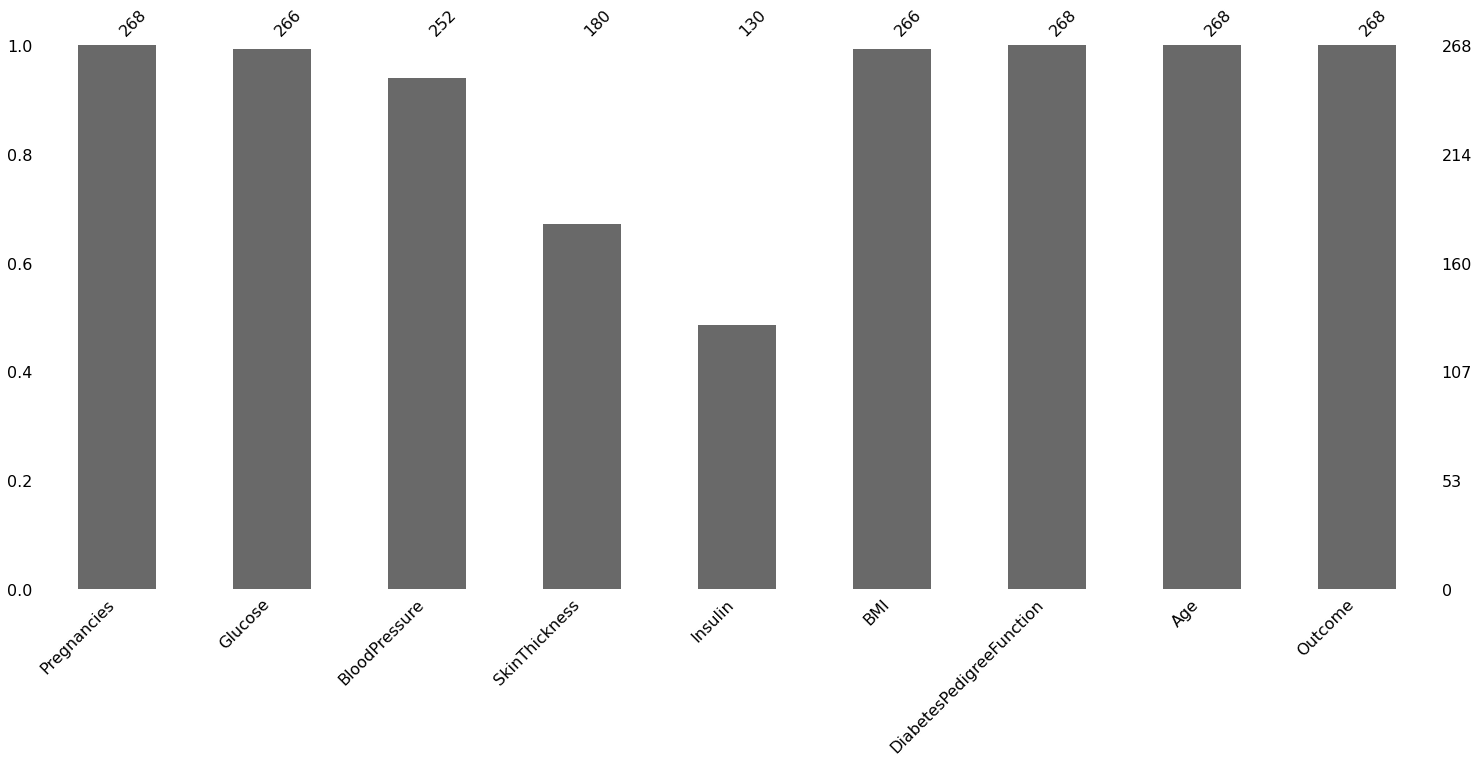

In [104]:
msno.bar(Diabetic_n)

#### **plotting msno matrix for Non_diabetic population**

<AxesSubplot:>

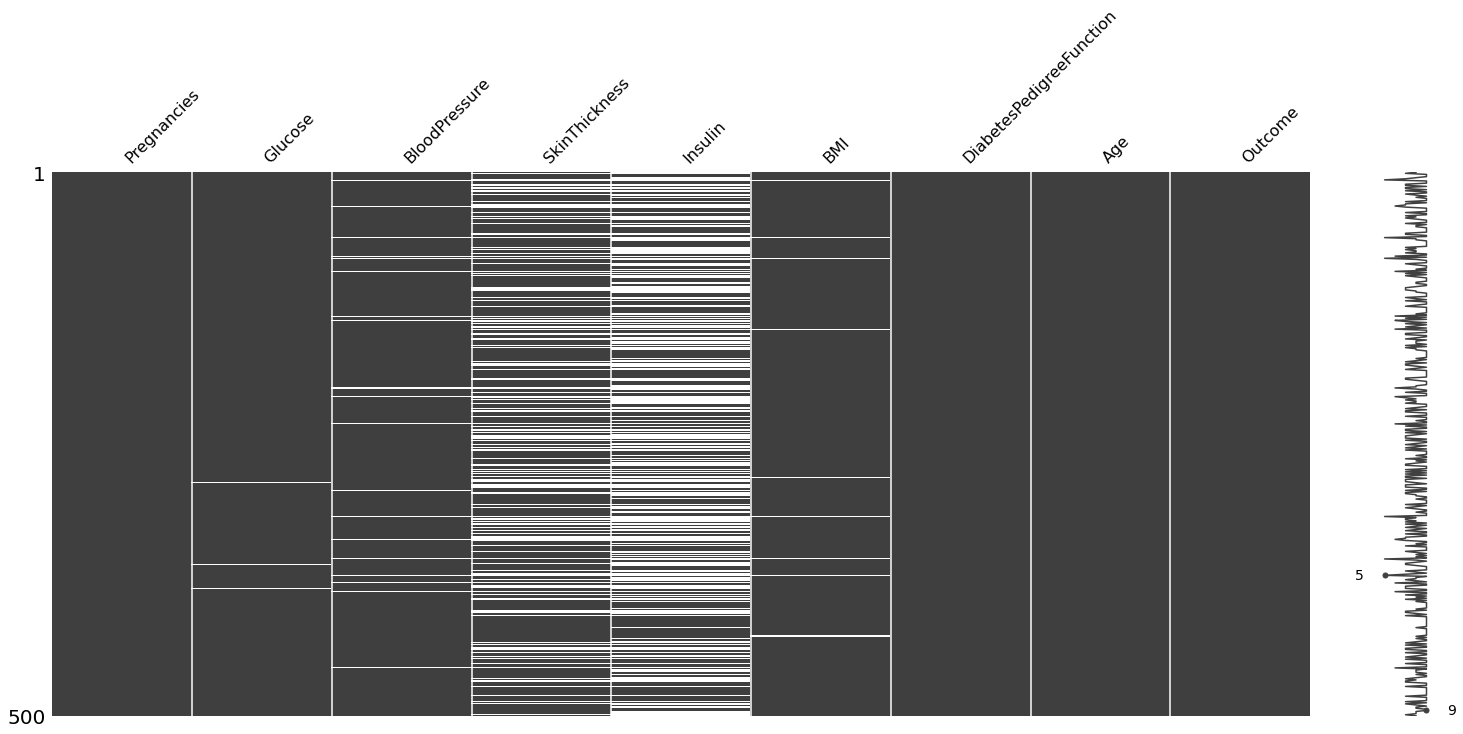

In [105]:
sorted = Non_Diabetic_n.sort_values('Outcome')
msno.matrix(sorted)

#### **plotting msno matrix for diabetic population**

<AxesSubplot:>

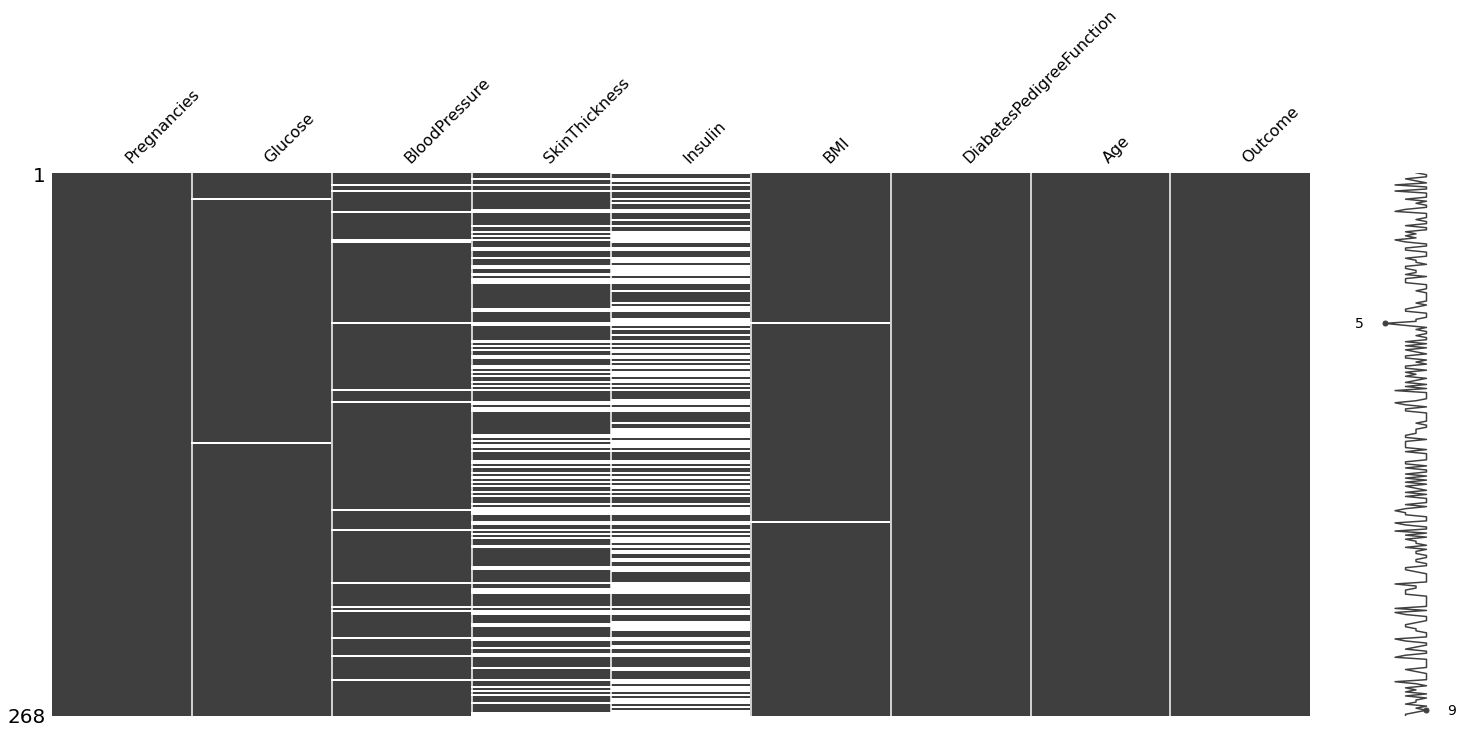

In [106]:
sorted = Diabetic_n.sort_values('Outcome')

msno.matrix(sorted)

In [107]:
data_diabetes_null=data_diabetes.copy()
data_diabetes_null[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_diabetes_null[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [108]:
data_diabetes_null.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### **Observations:**

As Glucose and BMI having missing values less than 1%. So we can delete those observations

#### **Deleting missing values whose percantage is less than 1**

In [109]:
data_diabetes_null = data_diabetes_null.dropna(subset=['Glucose','BMI']) # to drop null values observations
data_diabetes_null.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                28
SkinThickness               218
Insulin                     360
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [110]:
data_diabetes_null.shape

(752, 9)

#### **Inferences:**
16 observations were deleted

## **Separating dependent and independent features:**

In [111]:

X = data_diabetes_null.iloc[:, :-1] # independent variables

In [112]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47


In [113]:
y = data_diabetes_null.iloc[:, -1] # dependent

In [114]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 752, dtype: int64

###**splitting train and test:**

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
x_train_full=pd.concat([x_train,y_train],axis=1)
x_train_full=x_train_full.reset_index()


#### **Installing necessary module to perform imputations:**

In [116]:
 !pip install fancyimpute

#### **Median Imputation:**

In [117]:
from sklearn.impute import SimpleImputer
x_train_median = x_train.copy(deep=True) # creating a copy for further evaluation
median_imputer = SimpleImputer(strategy='median')
x_train_median.iloc[:, :] = median_imputer.fit_transform(x_train_median)
x_test_median = x_test.copy(deep=True) # creating a copy for further evaluation
x_test_median.iloc[:, :] = median_imputer.fit_transform(x_test_median)

In [118]:
x_train_full_median=pd.concat([x_train_median,x_test_median],axis=0)
x_train_full_median=x_train_full_median.reset_index(drop=True)
x_train_full_median.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

#### **KNN Imputation:**

In [119]:
from fancyimpute import KNN   # imputing with KNN
knn_imputer = KNN()
x_train_knn = x_train.copy(deep=True)
x_train_knn.iloc[:, :] = knn_imputer.fit_transform(x_train_knn)
x_test_knn = x_test.copy(deep=True)
x_test_knn.iloc[:, :] = knn_imputer.fit_transform(x_test_knn)


Imputing row 1/601 with 0 missing, elapsed time: 0.112
Imputing row 101/601 with 2 missing, elapsed time: 0.117
Imputing row 201/601 with 2 missing, elapsed time: 0.121
Imputing row 301/601 with 0 missing, elapsed time: 0.125
Imputing row 401/601 with 1 missing, elapsed time: 0.129
Imputing row 501/601 with 0 missing, elapsed time: 0.132
Imputing row 601/601 with 2 missing, elapsed time: 0.137
Imputing row 1/151 with 1 missing, elapsed time: 0.012
Imputing row 101/151 with 2 missing, elapsed time: 0.015


In [120]:
x_train_full_knn=pd.concat([x_train_knn,x_test_knn],axis=0)
x_train_full_knn=x_train_full_knn.reset_index(drop=True)
x_train_full_knn.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

#### **MICE Imputation:**

In [121]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()   # MICE Imputation
x_train_MICE = x_train.copy(deep=True)
x_train_MICE.iloc[:, :] = MICE_imputer.fit_transform(x_train_MICE)
x_test_MICE= x_test.copy(deep=True)
x_test_MICE.iloc[:, :] = MICE_imputer.fit_transform(x_test_MICE)


In [122]:
x_train_full_MICE=pd.concat([x_train_MICE,x_test_MICE],axis=0)
x_train_full_MICE=x_train_full_MICE.reset_index(drop=True)
x_train_full_MICE.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

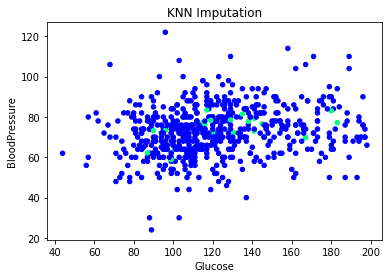

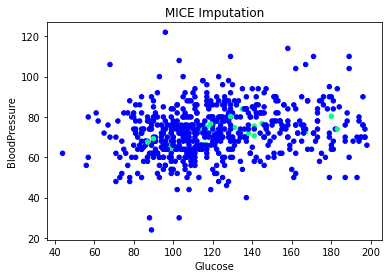

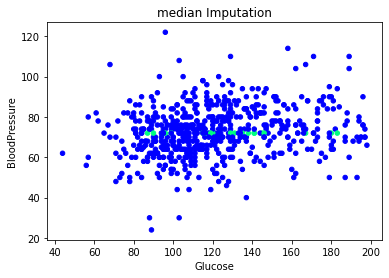

In [123]:
fig = plt.Figure()
null_values = x_train['Glucose'].isnull() +x_train['BloodPressure'].isnull() 
fig = x_train_knn.plot(x='Glucose', y='BloodPressure', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)
fig = x_train_MICE.plot(x='Glucose', y='BloodPressure', kind='scatter', c=null_values, cmap='winter', title='MICE Imputation', colorbar=False)
fig = x_train_median.plot(x='Glucose', y='BloodPressure', kind='scatter', c=null_values, cmap='winter', title='median Imputation', colorbar=False)



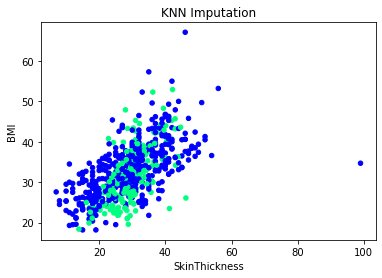

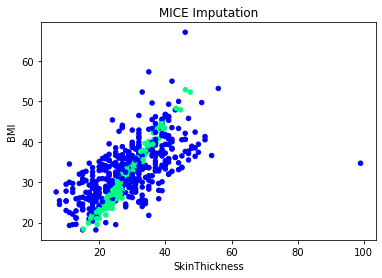

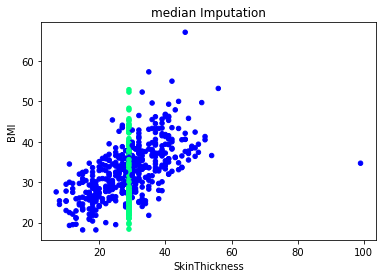

In [124]:
fig = plt.Figure()
null_values = x_train['SkinThickness'].isnull() +x_train['BMI'].isnull() 
fig = x_train_knn.plot(x='SkinThickness', y='BMI', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)
fig = x_train_MICE.plot(x='SkinThickness', y='BMI', kind='scatter', c=null_values, cmap='winter', title='MICE Imputation', colorbar=False)
fig = x_train_median.plot(x='SkinThickness', y='BMI', kind='scatter', c=null_values, cmap='winter', title='median Imputation', colorbar=False)

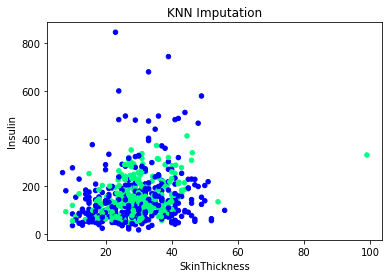

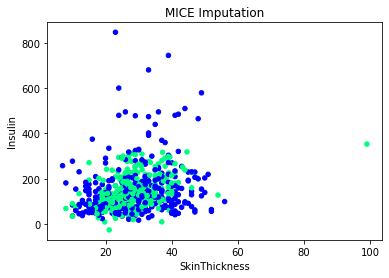

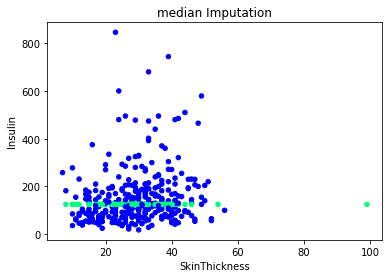

In [125]:
fig = plt.Figure()
null_values = x_train['SkinThickness'].isnull() +x_train['Insulin'].isnull() 
fig = x_train_knn.plot(x='SkinThickness', y='Insulin', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)
fig = x_train_MICE.plot(x='SkinThickness', y='Insulin', kind='scatter', c=null_values, cmap='winter', title='MICE Imputation', colorbar=False)
fig = x_train_median.plot(x='SkinThickness', y='Insulin', kind='scatter', c=null_values, cmap='winter', title='median Imputation', colorbar=False)

#### **Inferences:**

KNN is filling null values accurate than Median and MICE

In [126]:
x_train=pd.concat([x_train_knn,y_train],axis=1)
x_train.head()
x_test=pd.concat([x_test_knn,y_test],axis=1)
data_fill=pd.concat([x_train,x_test],axis=0)
data_fill=data_fill.astype({'Pregnancies':'int64', 'Glucose':'int64', 'BloodPressure':'int64', 'SkinThickness':'int64', 'Insulin':'int64',
       'Age':'int64'})  #converting float to int


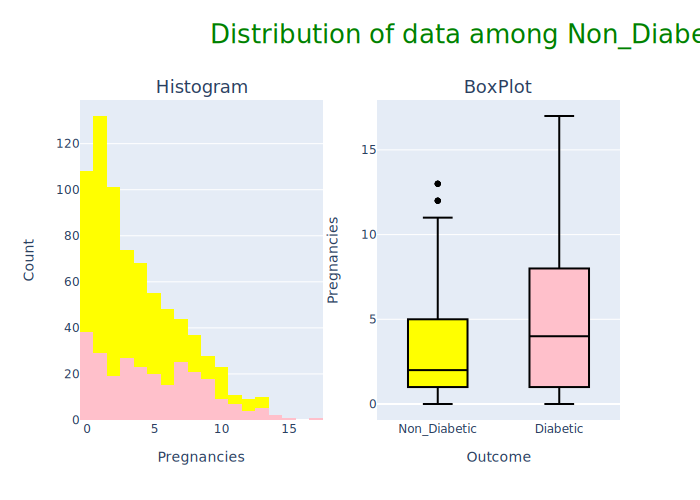

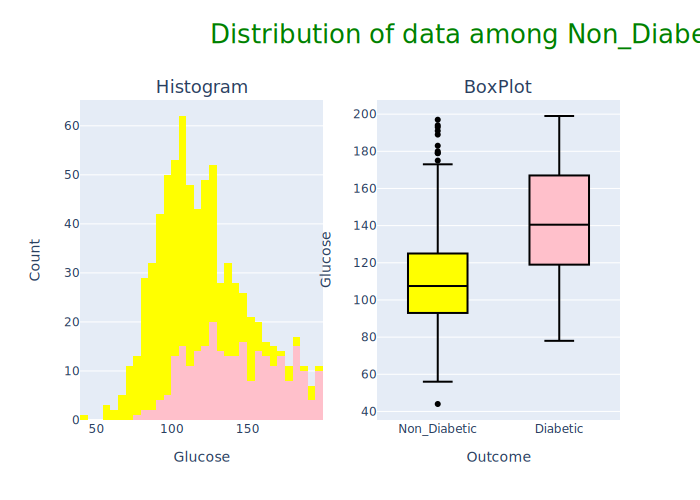

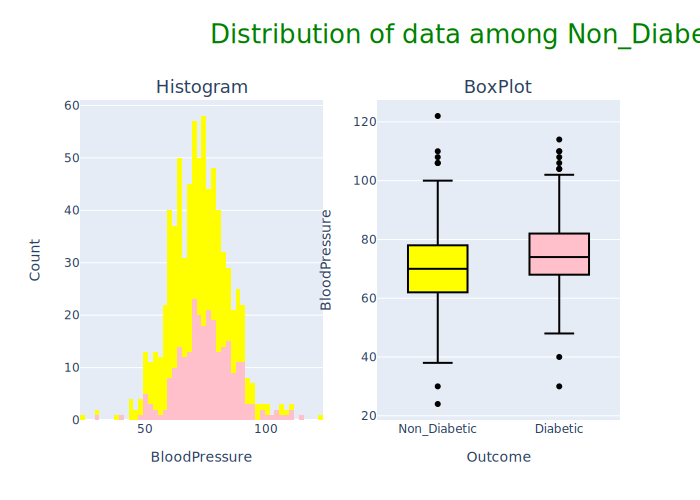

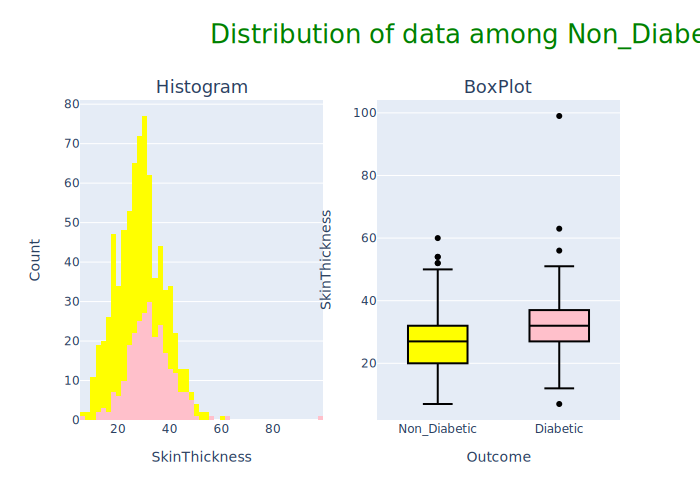

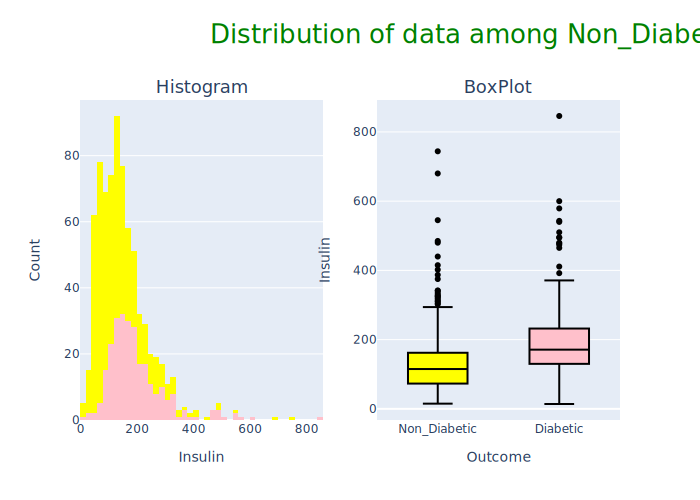

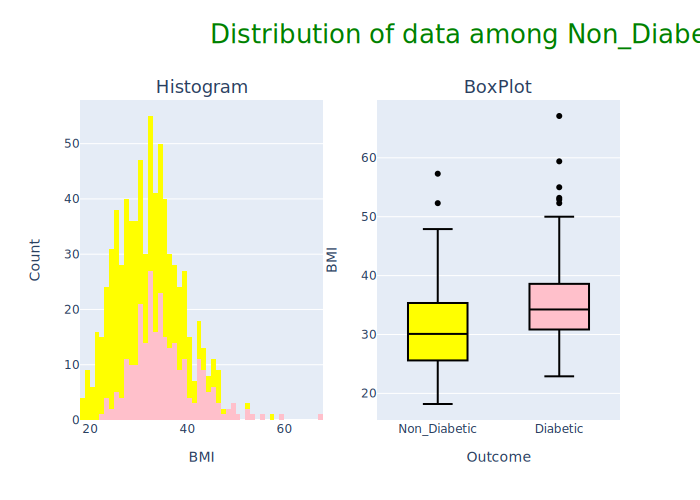

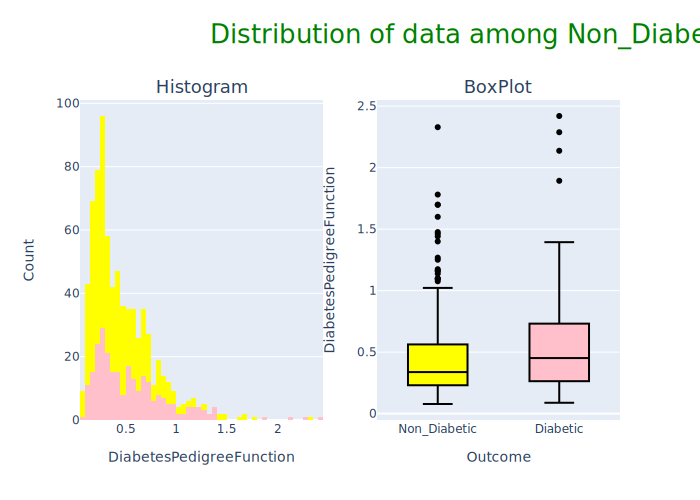

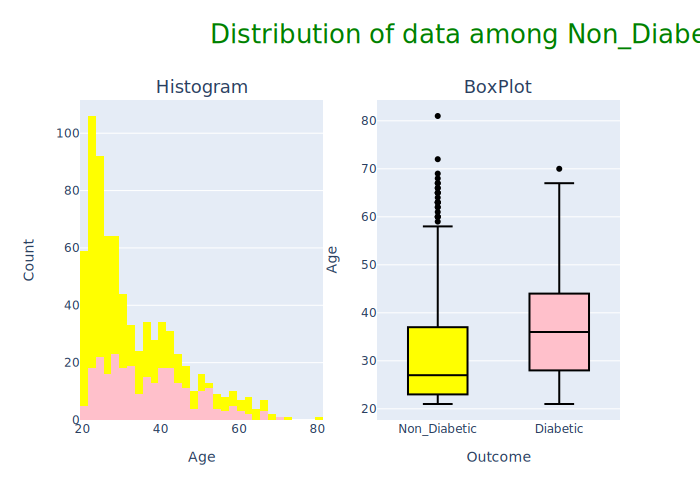

In [127]:
for col in data_fill:  # iterating through dataset
  if col!='Outcome':
    fig = make_subplots(rows=1, cols=2,subplot_titles=['Histogram','BoxPlot'], horizontal_spacing=0.1,vertical_spacing=0.2)
    Non_Diabetic = data_fill[data_fill['Outcome']==0]
    Diabetic = data_fill[data_fill['Outcome']==1]
    fig.add_trace(go.Histogram(histfunc="count",x=Diabetic[col],
                                                    name="Diabetic",marker_color='pink'),row=1, col=1)

    fig.add_trace(
    go.Histogram(histfunc="count",x=Non_Diabetic[col],
                            name="Healthy",marker_color='yellow'),
    row=1, col=1)
    fig.update_layout(barmode='stack')
    fig.add_trace(go.Box(y=Non_Diabetic[col], name="Non_Diabetic",line=dict(color='black'),fillcolor='yellow',),row=1,col=2)
    fig.add_trace(go.Box(y=Diabetic[col], name="Diabetic",line=dict(color='black'),fillcolor='pink'),row=1,col=2)
    fig.update_annotations(font_size=18)
    fig.update_layout({'title':{'text':"Distribution of data among Non_Diabetic and Diabetic",
                            'x':0.3,'y':0.95,
                            'font_size':26,
                            'font_color':'Green'}},
                  showlegend=False)
    fig['layout']['xaxis']['title']=col
    fig['layout']['xaxis2']['title']='Outcome'
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']=col
    fig.show(renderer="svg")

# **Handling Outliers**

#### Lets compute the Interquantile range to calculate the boundaries

In [128]:
def outlier_treatment(df):  # calculating lower and upper bridge
  IQR=df.quantile(0.75)-df.quantile(0.25)
  lower_bridge=df.quantile(0.25)-(IQR*1.5)
  upper_bridge=df.quantile(0.75)+(IQR*1.5)
  return(lower_bridge,upper_bridge)

### **Replacing outliers of Non_diabetic**

In [129]:
df=Non_Diabetic.copy()
for col in df:  # replacing outliers of Non_diabetic people by lower and upper bridge values
  lower_bridge,upper_bridge=outlier_treatment(df[col])
  df.loc[df[col]<=lower_bridge,col]=lower_bridge
  df.loc[df[col]>=upper_bridge,col]=upper_bridge

### **Replacing outliers of diabetic**

In [130]:
df1=Diabetic.copy()
for col in df: # replacing outliers of diabetic people by lower and upper bridge values
  lower_bridge,upper_bridge=outlier_treatment(df1[col])
  df1.loc[df1[col]<=lower_bridge,col]=lower_bridge
  df1.loc[df1[col]>=upper_bridge,col]=upper_bridge

In [131]:
final_data=pd.concat([df, df1], ignore_index=True) # concatinating for furthure analysis
final_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84,50,23,76.0,30.4,0.96800,21,0
1,1.0,173,50,16,295.5,25.9,0.65500,24,0
2,0.0,125,96,25,120.0,22.5,0.26200,21,0
3,1.0,77,56,30,56.0,33.3,1.05825,24,0
4,1.0,112,72,30,176.0,34.4,0.52800,25,0


### **Box plot to check Outliers**

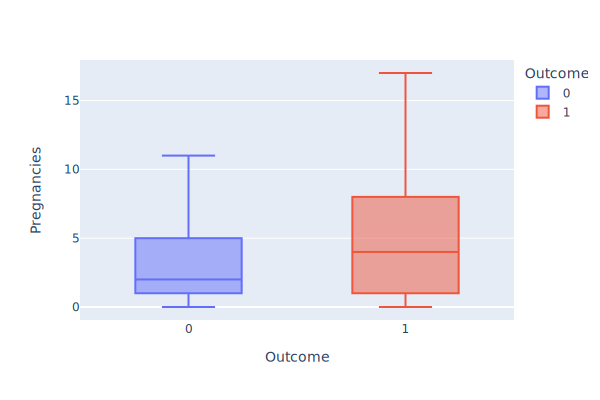

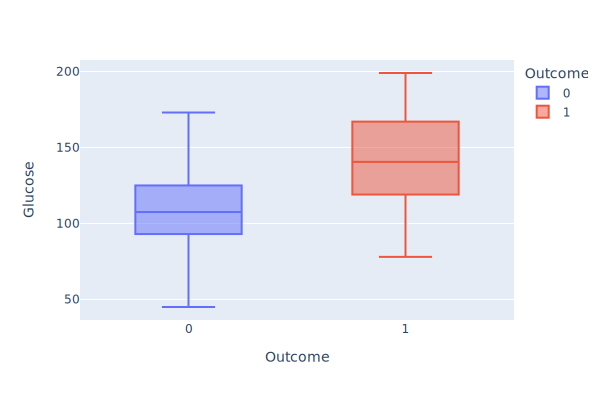

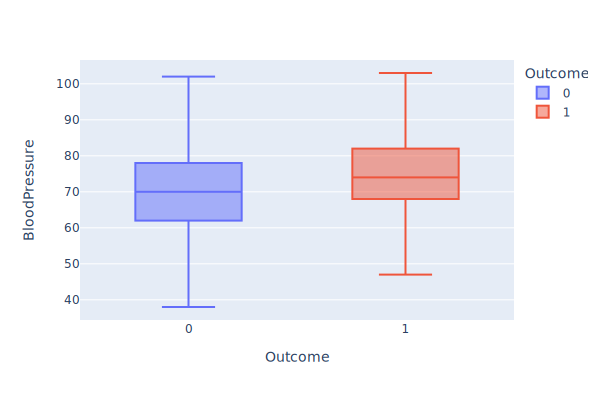

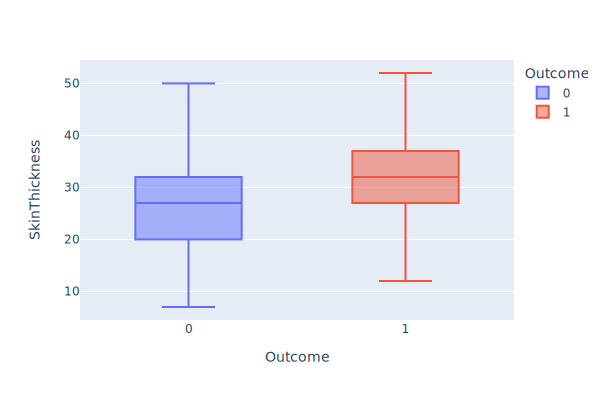

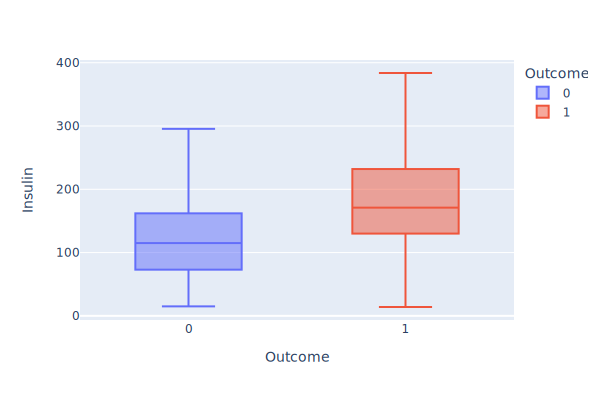

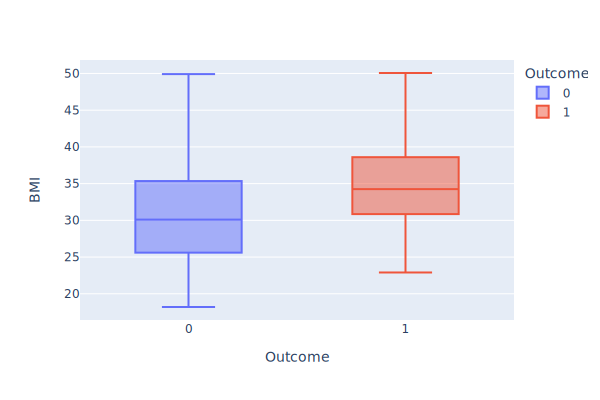

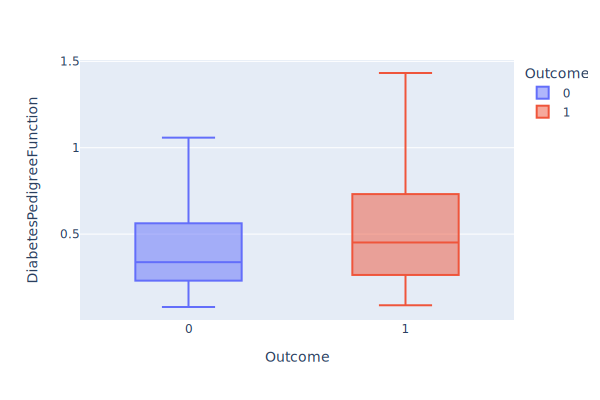

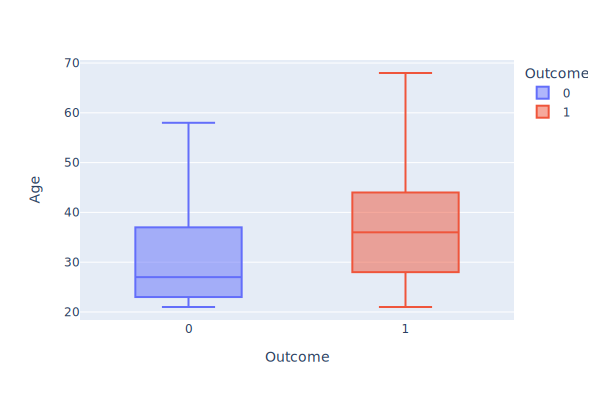

In [133]:
for col in final_data:
  if col!='Outcome':
    fig = px.box(final_data, x="Outcome", y=col,width=600,height=400,color='Outcome')
    fig.show(renderer="svg")

### **Distribution of Indepndent Variables after treating of Outliers**

<AxesSubplot:xlabel='Age', ylabel='Density'>

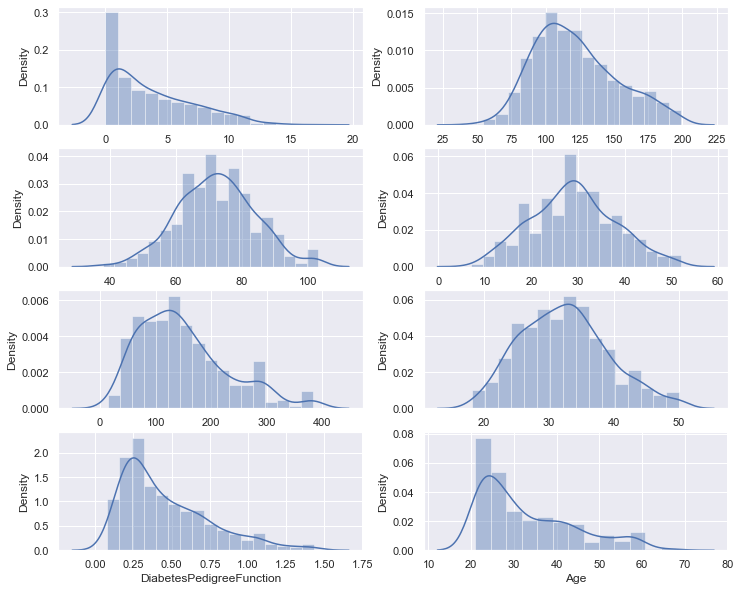

In [134]:
sns.set()
fig, axes = plt.subplots(4, 2,figsize=(12, 10)) # creatin distplots
sns.distplot(final_data['Pregnancies'],ax=axes[0,0]) 
sns.distplot(final_data['Glucose'],ax=axes[0,1])
sns.distplot(final_data['BloodPressure'],ax=axes[1,0])
sns.distplot(final_data['SkinThickness'],ax=axes[1,1])
sns.distplot(final_data['Insulin'],ax=axes[2,0])
sns.distplot(final_data['BMI'],ax=axes[2,1])
sns.distplot(final_data['DiabetesPedigreeFunction'],ax=axes[3,0])
sns.distplot(final_data['Age'],ax=axes[3,1])


# **Feature Transformation:**

Iam using min-max scaler to transform the data because most of the features are rigthly skewed

### min max

In [135]:
X = final_data.iloc[:, :-1] # independent variables
y = final_data.iloc[:, -1] # dependent

In [136]:
from sklearn.model_selection import train_test_split  # train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [137]:
from sklearn.preprocessing import MinMaxScaler  # using minmax scaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(X_train))
df_minmax.head()

,0,1,2,3,4,5,6,7
0,0.117647,0.443662,0.615385,0.466667,0.590567,0.043939,0.554360,0.787234
1,0.588235,0.316901,0.584615,0.911111,0.442925,0.461357,0.063822,0.787234
2,0.294118,0.352113,0.676923,0.511111,0.369105,0.668497,0.149165,0.361702
3,0.000000,0.309859,0.492308,0.422222,0.087491,0.395449,0.379963,0.000000
4,0.058824,0.373239,0.276923,0.311111,0.319891,0.219694,0.555102,0.042553


### Plotting after data transformation

<AxesSubplot:xlabel='Age', ylabel='Density'>

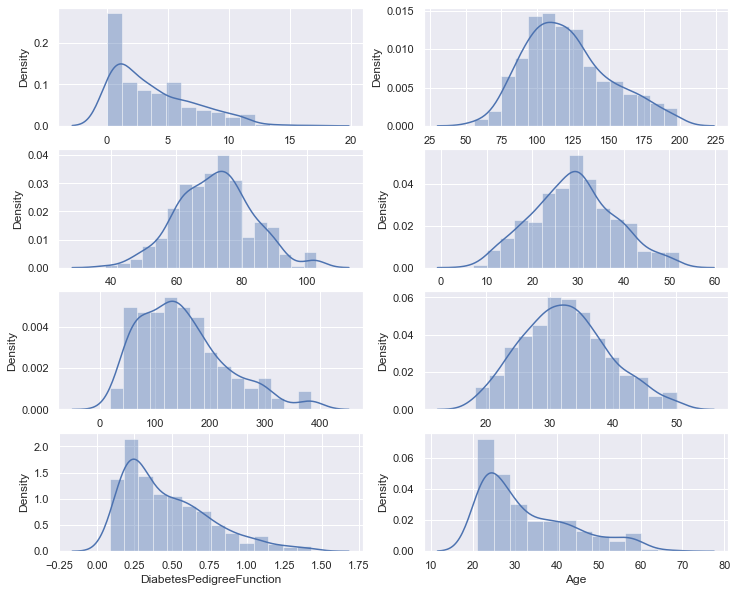

In [138]:
sns.set()
fig, axes = plt.subplots(4, 2,figsize=(12, 10))
sns.distplot(X_train['Pregnancies'],ax=axes[0,0])
sns.distplot(X_train['Glucose'],ax=axes[0,1])
sns.distplot(X_train['BloodPressure'],ax=axes[1,0])
sns.distplot(X_train['SkinThickness'],ax=axes[1,1])
sns.distplot(X_train['Insulin'],ax=axes[2,0])
sns.distplot(X_train['BMI'],ax=axes[2,1])
sns.distplot(X_train['DiabetesPedigreeFunction'],ax=axes[3,0])
sns.distplot(X_train['Age'],ax=axes[3,1])

# **Feature Selection:**

As we have less no of feature in our dataset,so we can use all features to build our model.

# **Conclusion**

Report:

*   Totally 16 Observations are removed as they are less than 1% of our data
*   Final data contains 752 observartions and 9 features
*   The features like Glucose,BloodPressure,SkinThickness,Insulin and BMI have 0 as minimum value but it is not possible in real life. so we have used Median technique to replace those values
*  There are ouliers in most of the features and we have handled them separately using IQR

*   There is a dependency between Glucose and Insulin,Skinthickness and BMI,age and pregnancies but less dependency
*   Most of the features are rightly skewed so we have use min-max scaler to transform the data
*   As data set contains less features so we didnt performed any feature selection techniques





Pima_diabetes_data statistical analysis is done and represented data graphically.There are no duplicates in the data.Features like Glucose,BloodPressure,SkinThickness,Insulin and BMI have 0(missing )values in the data,so they were replaced by using Advanced Imputation technique KNN. Outliers are there in the data,so they were treated separetly for each population by its lower and upper bound.Some of the features are not normally distributed,feature transformation is performed. Identified that there is a positive correlation between Glucose and Insulin,Skinthickness and BMI,age and pregnancies.
Finally the dataset contains all features(as it have less),this can be used to build Machine Learning Models